In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix

Using TensorFlow backend.


### Exploratory Data Analysis

In [28]:
data = pd.read_csv("googleplaystore.csv")
dataFrame = pd.DataFrame(data)

###### 1. Classifying numerical and categorical features

In [29]:
numerical_features   = dataFrame.select_dtypes(include = [np.number]).columns
categorical_features = dataFrame.select_dtypes(include= [np.object]).columns

###### 2. Converting categorical features to numerical features

In [30]:
def convertSize(x):
    if (x[-1]=='M'):
        return float(x[0:-1])
    elif (x[-1]=='k'):
        return float(x[0:-1])/1000
    else:
        return np.nan

def convertReviews(x):
    if (x[-1]=='M'):
        return int(float(x[0:-1])* 10**6)
    else:
        return int(x)
    
dataFrame['Reviews'] = dataFrame['Reviews'].map(lambda x: convertReviews(x))
dataFrame['Size'] = dataFrame['Size'].map(lambda x: convertSize(x))
dataFrame['Installs'] = dataFrame['Installs'].str.replace(',','').str.extract('(\d+)').astype('float')
dataFrame['Price'] = dataFrame['Price'].str.replace('$','').replace(',','').replace('Everyone',np.nan).astype('float')

###### 3. Recomputing numerical and categorical features

In [31]:
numerical_features   = dataFrame.select_dtypes(include = [np.number]).columns
categorical_features = dataFrame.select_dtypes(include= [np.object]).columns

###### 4. Plotting histogram of numerical features

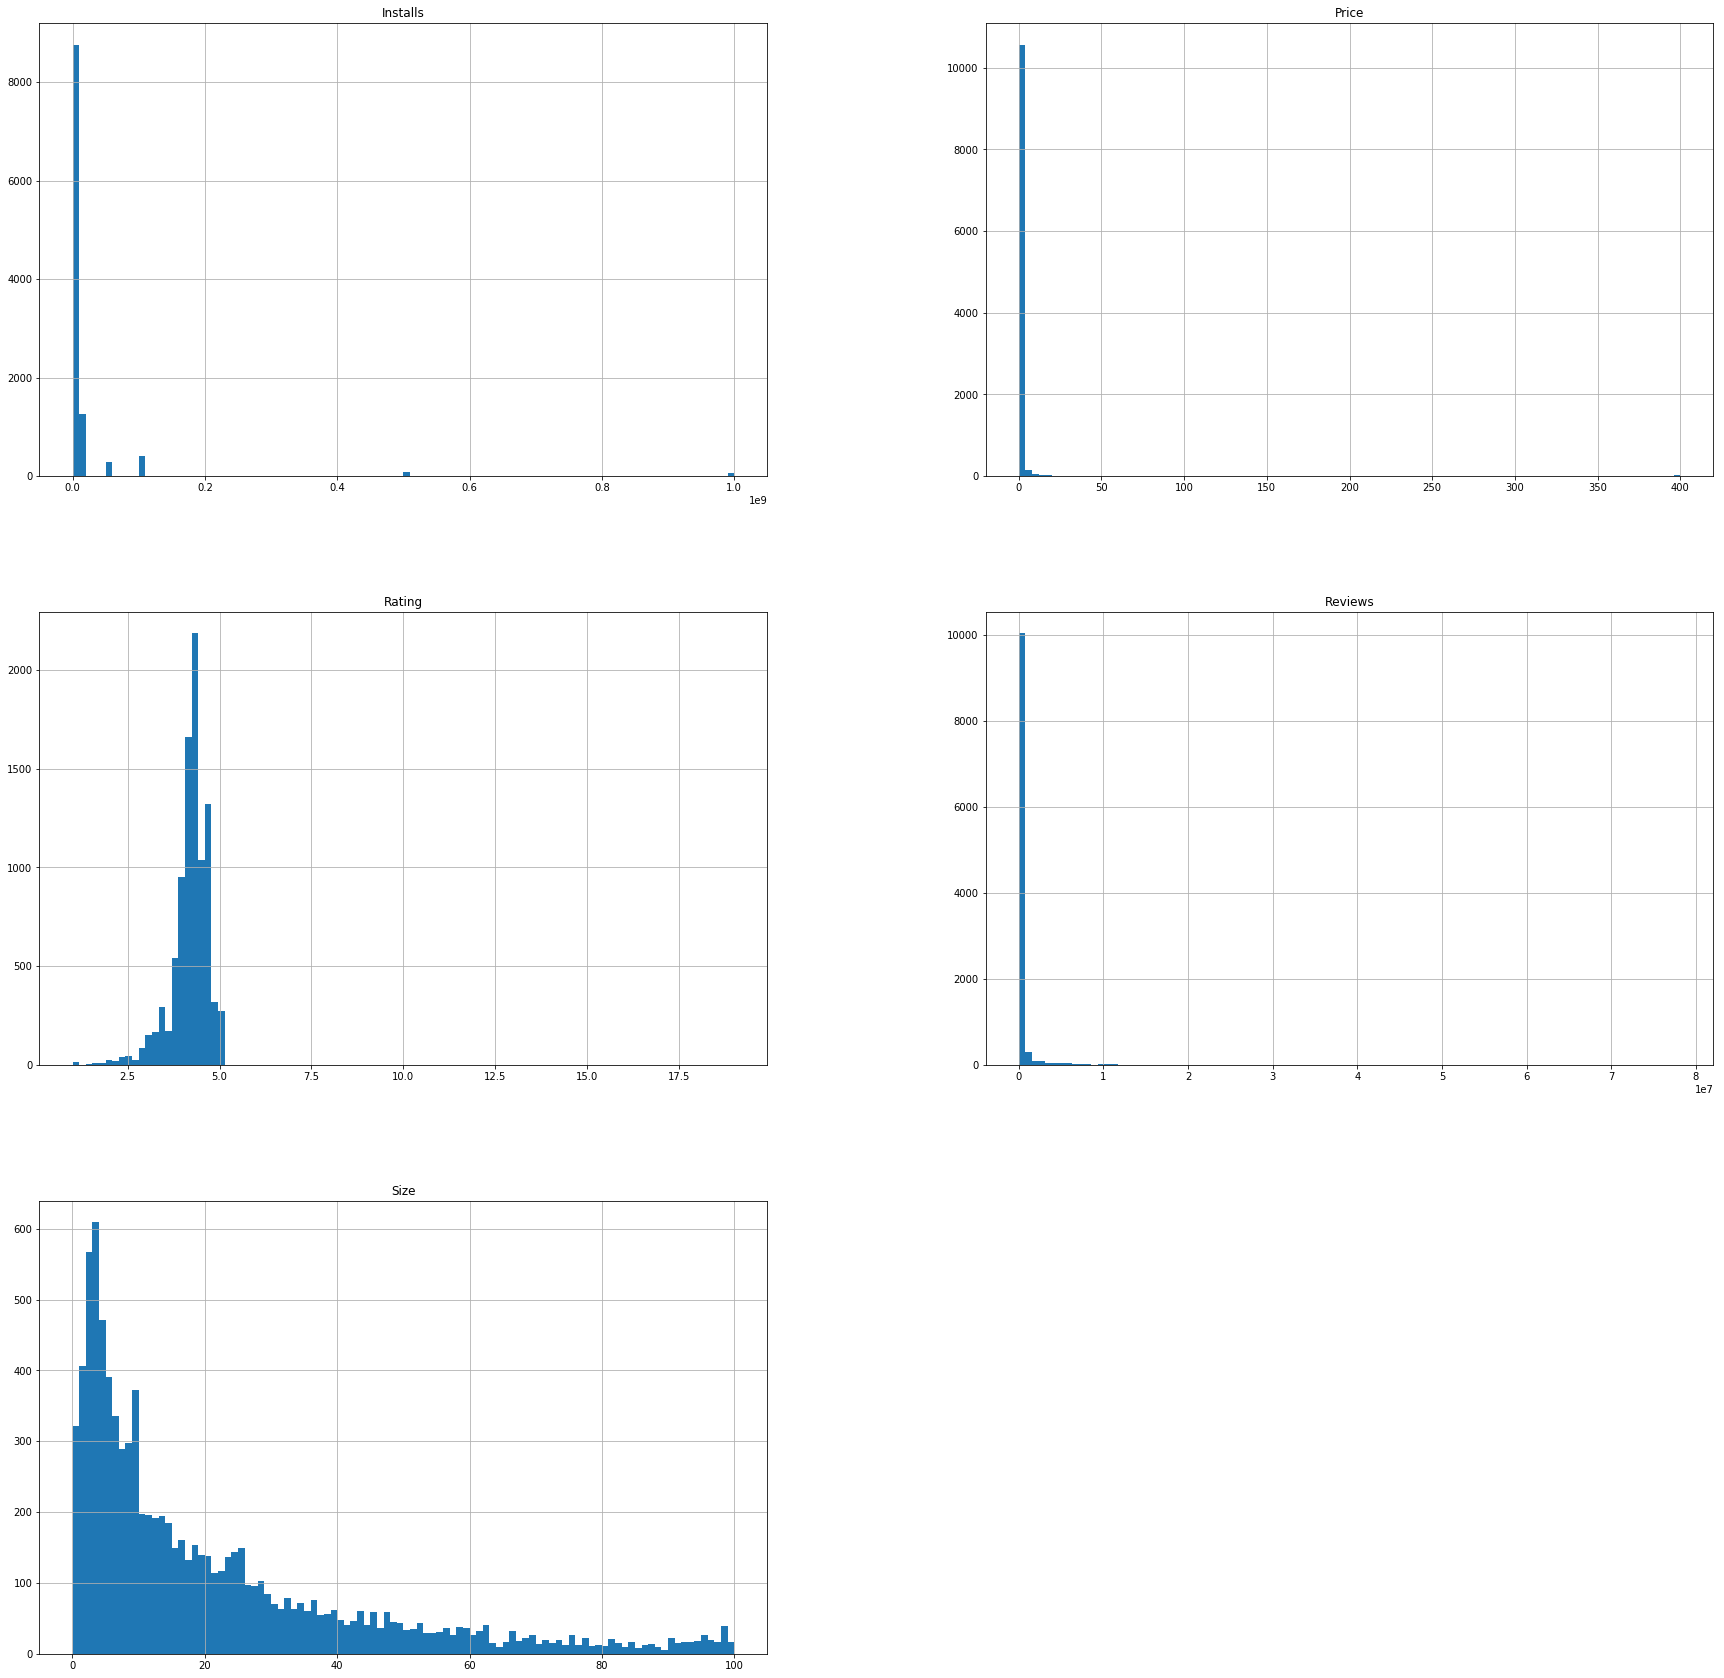

In [32]:
dataFrame.hist(bins=100, figsize=(30,30))
plt.show()

In [33]:
dataFrame.describe()

,Rating,Reviews,Size,Installs,Price
count,9367.000000,1.084100e+04,9145.000000,1.084000e+04,10840.000000
mean,4.193338,4.443887e+05,21.516530,1.546434e+07,1.027368
std,0.537431,2.927728e+06,22.588748,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.479800e+04,30.000000,5.000000e+06,0.000000
max,19.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


##### 5. Removing duplicates

In [34]:
dataFrame = dataFrame.drop_duplicates()

###### 6. Removing skewed columns

In [35]:
skew_values = dataFrame[numerical_features].skew(axis=1)
missing_values = dataFrame.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
Size,1527,14.085416
Rating,1465,13.513514
Current Ver,8,0.073794
Android Ver,3,0.027673
Content Rating,1,0.009224
Price,1,0.009224
Type,1,0.009224
Installs,1,0.009224
Last Updated,0,0.000000
Genres,0,0.000000


###### 7. Removing null rows

In [36]:
dataFrame.dropna(axis=0)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.600,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.000,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.000,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.000,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.100,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


###### Distribution of all numerical features

C:\Users\renji\AppData\Local\conda\conda\envs\dml\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\renji\AppData\Local\conda\conda\envs\dml\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


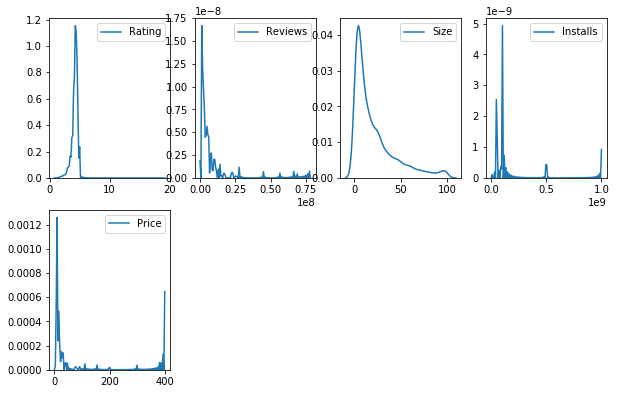

In [51]:
plt.figure(figsize=(10,10))
for i,col in enumerate(numerical_features):
    plt.subplot(3,4,i+1)
    sns.kdeplot(dataFrame[col],legend=True)

###### 8. Bivariate Analysis

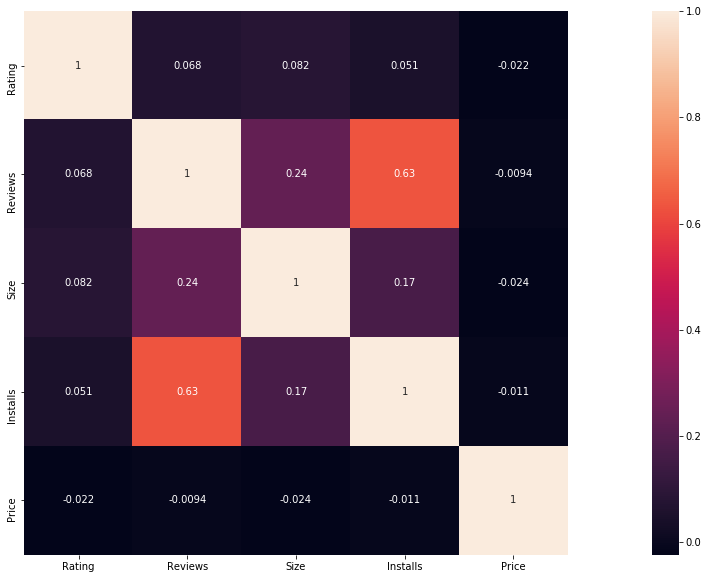

In [37]:
plt.figure(figsize=(30,10))
sns.heatmap(dataFrame[numerical_features].corr(), square=True, annot=True,robust=True, yticklabels=1)
plt.show()

###### 9. Cleaning Categorical Features

In [48]:
dataFrame.loc[dataFrame['Type']=='0','Type'] ='Free'
dataFrame['Content Rating'].fillna('Unrated')
dataFrame.loc[dataFrame['Content Rating']=='Adults only 18+', 'Content Rating'] = 'Mature 17+'

###### 10. Drop unwanted features

In [47]:
print(dataFrame['Category'].unique())
print(dataFrame[dataFrame['Category']=='1.9'])

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
                                           App Category  Rating  Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0  3000000   

       Size  Installs  Type  Price Content Rating             Genres  \
10472   NaN       NaN  Free    NaN            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  
